In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from scipy import signal
from scipy.signal import find_peaks

In [2]:
st_exhalation = obspy.read('More_examples_SAC/Exhalation/20210427055046/PPCU_HHE_CN_--.sac')

In [3]:
print(st_exhalation)

1 Trace(s) in Stream:
CN.PPCU.--.HHE | 2021-04-27T05:50:46.595000Z - 2021-04-27T05:51:46.585000Z | 100.0 Hz, 6000 samples


In [4]:
print(st_exhalation[0].stats)

         network: CN
         station: PPCU
        location: --
         channel: HHE
       starttime: 2021-04-27T05:50:46.595000Z
         endtime: 2021-04-27T05:51:46.585000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 6000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0099999998, 'b': 0.0, 'e': 59.989998, 'nzyear': 2021, 'nzjday': 117, 'nzhour': 5, 'nzmin': 50, 'nzsec': 46, 'nzmsec': 595, 'nvhdr': 6, 'npts': 6000, 'iftype': 1, 'leven': 1, 'kstnm': 'PPCU', 'khole': '--', 'kcmpnm': 'HHE', 'knetwk': 'CN', 'kevnm': ''})


In [31]:
x_exhalation=st_exhalation[0].data # Data
fs_exhalation=100 # Sampling rate 

In [69]:
x_exhalation

array([ 596.,  594.,  592., ...,  672.,  664.,  662.], dtype=float32)

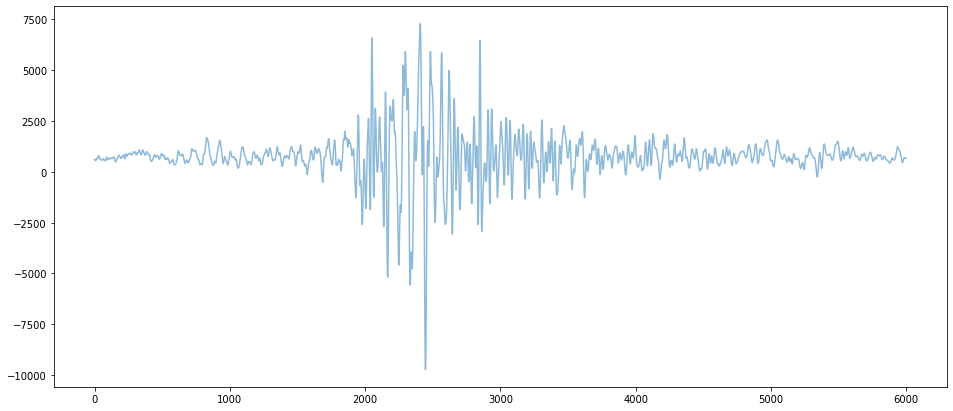

In [32]:
plt.figure(figsize=(16,7))
plt.plot(x_exhalation, alpha=0.5)
plt.show()

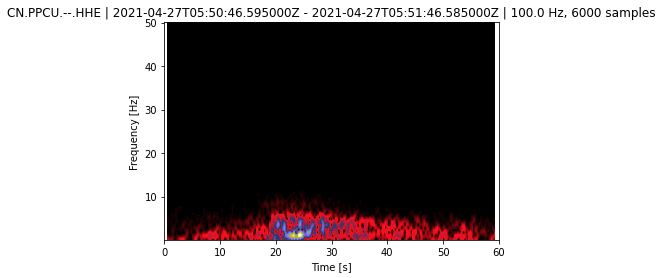

[None]

In [73]:
st_exhalation.spectrogram(cmap='gist_stern',  samp_rate=100)

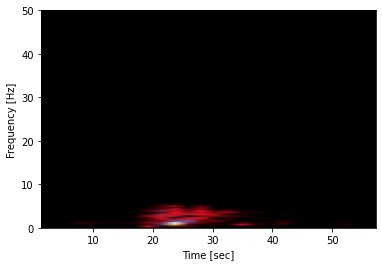

In [74]:
f_exhalation, t_exhalation, Sxx_exhalation = signal.spectrogram(x_exhalation, fs_exhalation)
plt.pcolormesh(t_exhalation, f_exhalation, Sxx_exhalation, shading='gouraud', cmap='gist_stern')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [12]:
peaks_exhalation, _ = find_peaks(x_exhalation, prominence=1000)
mean_exhalation = np.ones(len(x_exhalation)) * np.mean(x_exhalation)
np.mean(x_exhalation)

751.76569

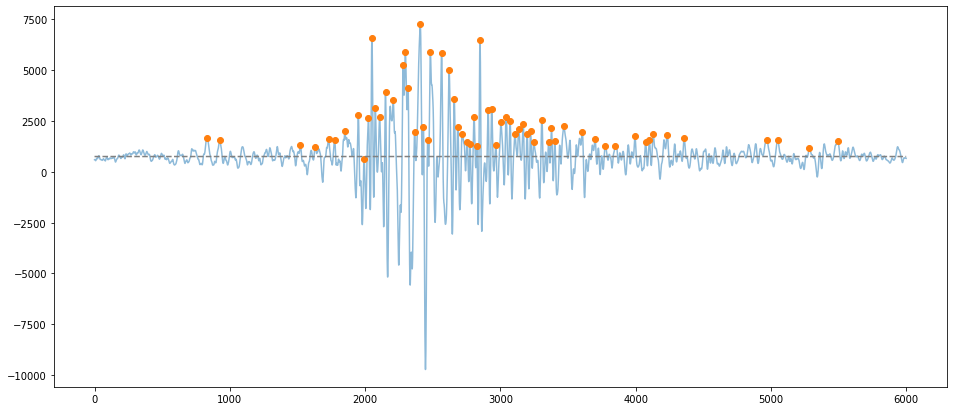

In [13]:
plt.figure(figsize=(16,7))
plt.plot(x_exhalation, alpha=0.5)
plt.plot(peaks_exhalation, x_exhalation[peaks_exhalation], "o")
plt.plot(mean_exhalation, "--", color="gray")
plt.show()

In [76]:
st = obspy.read('/Users/octavio/Google Drive/ITT/unlabelled/20190314230004/PPSX_BHE_CN.sac')

In [77]:
print(st)

1 Trace(s) in Stream:
CN.PPSX..BHE | 2019-03-14T23:00:04.831000Z - 2019-03-14T23:59:52.971000Z | 100.0 Hz, 358815 samples


In [78]:
x=st[0].data # Data
fs=100 # Sampling rate

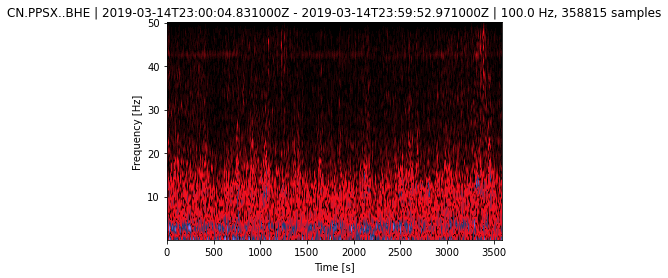

[None]

In [81]:
st.spectrogram(cmap='gist_stern',  samp_rate=fs)

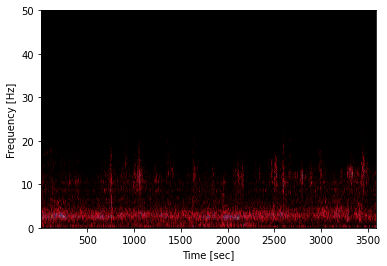

In [80]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='gist_stern')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

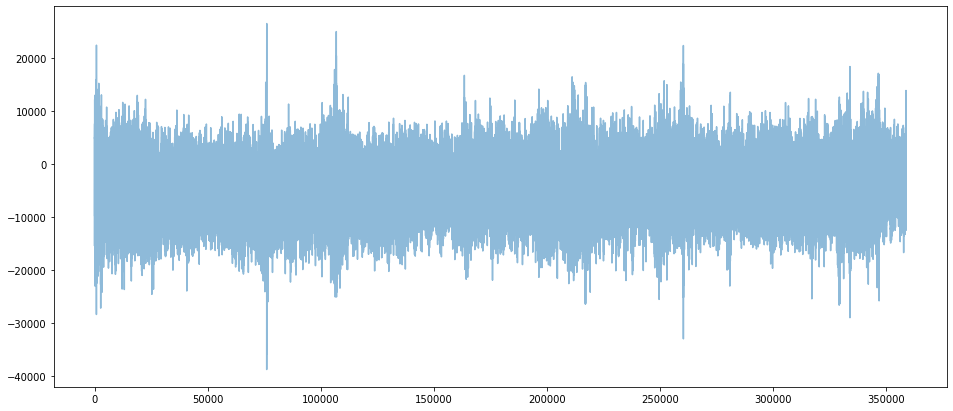

In [82]:
plt.figure(figsize=(16,7))
plt.plot(x, alpha=0.5)
plt.show()

In [88]:
n = 100
m = 6000

fig, axs = plt.subplots(n, sharex=True,sharey=True, figsize=(16,7 * n))
for i in range(n):
    data = x[i*m:m+(i*m)]
    axs[i].plot(data, alpha=0.5)
    #axs[i,1].obspy.imaging.spectrogram.spectrogram(data, samp_rate=100, cmap="gist_stern")
plt.tight_layout()
plt.show()